### **Page Ranking Algorithm**

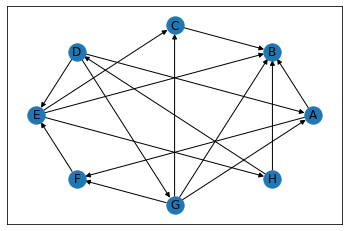

In [3]:
import networkx as nx
from matplotlib import pyplot as plt

adjacency_matrix = [

[0, 1, 0, 0, 0, 1, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0],

[0, 1, 0, 0, 0, 0, 0, 0],

[1, 0, 0, 0, 1, 0, 1, 0],

[0, 1, 1, 0, 0, 0, 0, 1],

[0, 0, 0, 0, 1, 0, 0, 0],

[1, 1, 1, 0, 0, 1, 0, 0],

[0, 1, 0, 1, 0, 0, 0, 0]

]
num_vertices = 8
vertices_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
graph = nx.DiGraph() 

# Load the nodes into the graph

graph.add_nodes_from(vertices_list)


# Add the edges from the adjacency matrix

for i in range(num_vertices) :
  for j in range(num_vertices) :
    if adjacency_matrix[i][j] == 1 :
      graph.add_edge(vertices_list[i], vertices_list[j])


# Draw generated graph

nx.draw_networkx(graph, pos=nx.circular_layout(graph), arrows=True, with_labels= True)

plt.show()

In [4]:
# Compute the page ranks

page_ranks_networkx = nx.pagerank(graph, alpha=0.85) 
print("The page ranks are :\n") 
page_ranks_networkx

page_ranks_networkx = dict(sorted(page_ranks_networkx.items(), key=lambda item:item[1], reverse=True))

print("The Pages in the order of importance with the page rank scores obtained b y using NetworkX are : ")
for k, v in page_ranks_networkx.items() :
  print(k, "=", v)


The page ranks are :

The Pages in the order of importance with the page rank scores obtained b y using NetworkX are : 
B = 0.28120563198030324
E = 0.1606990303925196
C = 0.10983011816321761
F = 0.10229957241772619
H = 0.09415966695368949
A = 0.08941499371129827
D = 0.08864644387947536
G = 0.07374454250177016


### **Actual Page Rank Algorithm**

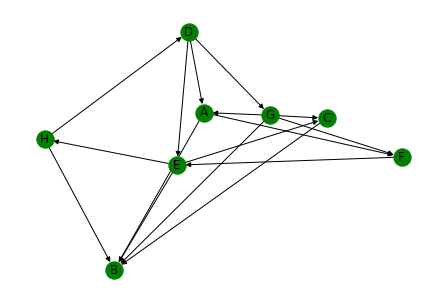

<Figure size 1080x720 with 0 Axes>

In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator

Graph = graph
nx.draw(Graph, with_labels=True, node_color='green') 
plt.figure(figsize=(15,10))
plt.show()

In [6]:
random_node = random.choice([i for i in range(Graph.number_of_nodes())])
dict_counter = {} 
for i in range(Graph.number_of_nodes()):
    dict_counter[i] = 0

dict_counter[random_node] = dict_counter[random_node]+1

try:
  for i in range(100):
      list_for_nodes = list(Graph.neighbors(random_node))
      if len(list_for_nodes)==0:# if random_node having no outgoing edges
          random_node = random.choice([i for i in range(Graph.number_of_nodes())])
          dict_counter[random_node] = dict_counter[random_node]+1
          
      else:
          random_node = random.choice(list_for_nodes) #choose a node randomly from neighbors
          dict_counter[random_node] = dict_counter[random_node]+1
except nx.exception.NetworkXError:
  print("")        
     
rank_node = nx.pagerank(Graph)


sorted_rank = sorted(rank_node.items(), key=operator.itemgetter(1))
sorted_random_walk = sorted(dict_counter.items(), key=operator.itemgetter(1))
print(sorted_rank)
print(sorted_random_walk)


[('G', 0.07374454250177016), ('D', 0.08864644387947536), ('A', 0.08941499371129827), ('H', 0.09415966695368949), ('F', 0.10229957241772619), ('C', 0.10983011816321761), ('E', 0.1606990303925196), ('B', 0.28120563198030324)]
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (7, 0), (6, 1)]
